# A Quick Guide to Deep Learning with Python

Kai Zhang, Duke Kunshan University, 2022

# Lecture 4 Neural Network

<figure>
 <img src="https://drive.google.com/uc?id=1OytZvfkVNL0q3Ai-q2b5GTNzpijaLX3R">
 <figcaption align="left">Figure 1. Neural network. X: input. Z: logit. A: activation. n, n1, n2, ..., K number of neurons in each layer.
 </figcaption>
</figure>


#1. Architecture of fully connected neural network

Here, we define a three-layer dense neural network multiclass classifier used for, e.g. the MNIST digit image recognition [Lecun 1998] (Figure 1). 

number of neurons: $n\rightarrow n_1 \rightarrow n_2 \rightarrow K$.

$m$: number of instances (samples), can be either the whole data set or a mini batch.

$n$: number of features (inputs).

$K$: number of classes (outputs).

$n_i$, number of neurons in the $i$th layer. $n_0=n$. $n_3=K$. For MNIST, $n=28^2=784$ and $K=10$.

$A(n, m)$: an $n$-row by $m$-column matrix.

We adopt the convention in Andrew Ng's lecture that the input matrix $X(n, m)$ is shaped with each sample $\vec{x}_i$ being a column vector.

The activation function $h_1(z) =h_2(z) = \sigma(z)$ and $h_3(z)=s(z)$, where the sigmoid function $\sigma(z) = 1/(1+\exp(-z))$ and the softmax function $$s(z_k) =  \frac{\exp(z_k)}{\sum\limits_{j=1}^K \exp(z_j)}.$$

# 2. Forward propagation

## 2.1 Input Layer

**Inputs**: 
\begin{equation}
X(n,m) = 
\begin{pmatrix}
    x_{11} & x_{12} & x_{13} & \cdots  & x_{1m} \\
    x_{21} & x_{22} & x_{23} & \cdots  & x_{2m} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & x_{n3} & \cdots  & x_{nm}
\end{pmatrix}
=\left(
  \begin{array}{cccc}
    |& | & & |\\
    \vec{x}_{1} & \vec{x}_{2} & \cdots & \vec{x}_{m} \\
    | & | & & | 
  \end{array}
\right)
\end{equation}

**Labels**:
\begin{equation}
\vec{y}^{T} = [y_1~~y_2~~\dots~~y_m],~~~y_i\in \{1, \dots, K\}
\end{equation}

One-hot representation
\begin{equation}
P(K, m)
=\left(
  \begin{array}{cccc}
    | & | & & |\\
    \vec{p}_{1} & \vec{p}_{2} & \dots & \vec{p}_{m} \\
    | & | & & | 
  \end{array}
\right)
,~p_{ki} = 1~{\rm if}~y_{i}=k;=0~{\rm otherwise}
\end{equation}

##2.2 1st Hidden Layer

**Weights** of the 1st hidden layer:
\begin{equation}
W^{[1]}(n_1, n)=
\begin{pmatrix}
    w_{11}^{[1]} & w_{12}^{[1]}  & w_{13}^{[1]}  & \dots  & w_{1n}^{[1]}  \\
    w_{21}^{[1]}  & w_{22}^{[1]} & w_{23}^{[1]}  & \dots  & w_{2n}^{[1]}  \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    w_{n_11}^{[1]}  & w_{n_12}^{[1]}  & w_{n_13}^{[1]}  & \dots  & w_{n_1n}^{[1]} 
\end{pmatrix}
=
\left(
  \begin{array}{c}
    - \vec{w}^{[1]T}_{1} - \\
    - \vec{w}^{[1]T}_{2} - \\
             \vdots              \\
    - \vec{w}^{[1]T}_{n_1} -
  \end{array}
\right)
\end{equation}

**Biases** of the 1st hidden layer:
\begin{equation}
\vec{b}^{[1]}(n_1, 1) = 
\left(
  \begin{array}{c}
  b^{[1]}_1\\
    b^{[1]}_2\\
  \vdots \\
    b^{[1]}_{n_1}\\
  \end{array}
\right)~~~~~
B^{[1]}(n_1, m)= 
\left(
  \begin{array}{cccc}
    | & | & & |\\
  \vec{b}^{[1]}  &\vec{b}^{[1]} & \cdots & \vec{b}^{[1]} \\
    | & | & & | 
  \end{array}
\right)
\end{equation}

**Logit**:
\begin{equation}
Z^{[1]}(n_1, m) =  W^{[1]}X  + B^{[1]}=
\left(
 \begin{array}{c c}
  \vec{w}^{[1]T}_{1} \vec{x}_{1}  + b^{[1]}_1 & \cdots \\
  \vec{w}^{[1]T}_{2} \vec{x}_{1}  + b^{[1]}_2 & \cdots \\
   \vdots & \vdots \\
  \vec{w}^{[1]T}_{n_1} \vec{x}_{1}  + b^{[1]}_{n_1} & \cdots 
  \end{array}
\right)=
\left(
  \begin{array}{cccc}
    | & | & & |\\
    \vec{z}^{[1]}_1 & \vec{z}^{[1]}_2 & \cdots & \vec{z}^{[1]}_m \\
    | & | & & | 
  \end{array}
\right)
\end{equation}

**Activation**:
\begin{equation}
A^{[1]}(n_1, m) = \sigma(Z^{[1]})=
\left(
  \begin{array}{cccc}
    | & | & & |\\
    \sigma(\vec{z}^{[1]}_1) & \sigma(\vec{z}^{[1]}_2) & \cdots & \sigma(\vec{z}^{[1]}_m) \\
    | & | & & | 
  \end{array}
\right)=
\left(
  \begin{array}{cccc}
    | & | & & |\\
    \vec{a}^{[1]}_1 & \vec{a}^{[1]}_2 & \cdots & \vec{a}^{[1]}_m \\
    | & | & & | 
  \end{array}
\right)
\end{equation}

##2.3 2nd Hidden Layer

**Weights**: 
$W^{[2]}(n_2, n_1)$

**Biases**: 
$\vec{b}^{[2]}(n_2, 1) ~~~ ~~  B^{[2]}(n_2, m)$

**Logit**:
$Z^{[2]}(n_2, m) =  W^{[2]}A^{[1]} + B^{[2]}$

**Activation**:
$A^{[2]}(n_2, m) = \sigma(Z^{[2]})$

##2.4 Output Layer ($n_3=K$)

**Weights**: 
$W^{[3]}(K, n_2)$

**Biases**: 
$\vec{b}^{[3]}(K, 1) ~~~ ~~  B^{[3]}(K, m)$

**Logit**:
$Z^{[3]}(K, m) =  W^{[3]}A^{[2]} + B^{[3]}$

**Activation via Softmax Function**:
\begin{equation}
A^{[3]}(K, m) = s(Z^{[3]}) = \left(
  \begin{array}{cccc}
    | & | & & |\\
    \vec{a}^{[3]}_1 & \vec{a}^{[3]}_2 & \cdots & \vec{a}^{[3]}_m \\
    | & | & & | 
  \end{array}
\right)
\end{equation}
where
\begin{equation}
a^{[3]}_{ki}=s(z^{[3]}_{ki})= \frac{ \exp(z^{[3]}_{ki})}{\sum\limits_{j=1}^{K} \exp(z^{[3]}_{ji})}\equiv \hat{p}_{ki}
\end{equation}
is the probability that sample $i$ belongs to class $k$. 

To predict the class label
\begin{equation}
  \begin{split}
\hat{y}_i &= \arg\max_k  ~[a^{[3]}_{1i}~~a^{[3]}_{2i}~~\dots~~a^{[3]}_{ki}~~\dots~~a^{[3]}_{Ki}]\\
& =\arg\max_k  ~[z^{[3]}_{1i}~~z^{[3]}_{2i}~~\dots~~z^{[3]}_{ki}~~\dots~~z^{[3]}_{Ki}]\\
&\in\{1,~2,~\dots,~K\}~~~~~(i=1,2,\dots,m)
  \end{split}
\end{equation}

**Cost Function**

cross entropy [shannon1948, jaynes1957, kullback1951]
\begin{equation}
J = - \sum_{i=1}^m \sum_{k=1}^K p_{ki} \log \hat{p}_{ki}  = - {\rm SUM} (P \ast \log \hat{P})
\end{equation}
where $\ast$ is element-wise multiplication and ${\rm SUM}$ is to sum all elements of the matrix.


<figure>
 <img src="https://drive.google.com/uc?id=1HLszhHKVhrvXQqz__WdSSyHetSk01_OE" width = "600">
 <figcaption align="left">Figure 2. Forward and backward propagation in neural network.
 </figcaption>
</figure>


# 3. Backward propagation

The forward propagation can be formally written as, if the biases terms are neglected or absorbed,
\begin{equation}
\hat{P}=s(W^{[3]}\sigma(W^{[2]}\sigma(W^{[1]}X)))
\end{equation}
and in the following notation $dX$ means $\partial J/\partial X$.

$\frac{\partial J}{\partial Z^{[3]}} = dZ^{[3]} = \hat{P} - P = A^{[3]} - P$

$dW^{[3]} = dZ^{[3]}  A^{[2]T}  $

$d\vec{b}^{[3]} = dZ^{[3]}  \vec{1}$

$dA^{[2]} = W^{[3]T} dZ^{[3]} $

$dZ^{[2]} = dA^{[2]} \ast A^{[2]} \ast (E - A^{[2]} )  $

$dW^{[2]} = dZ^{[2]}  A^{[1]T}  $

$d\vec{b}^{[2]} = dZ^{[2]}  \vec{1}$

$dA^{[1]} = W^{[2]T} dZ^{[2]} $

$dZ^{[1]} = dA^{[1]} \ast A^{[1]} \ast (E - A^{[1]} ) $

$dW^{[1]} = dZ^{[1]}  X^{T}  $

$d\vec{b}^{[1]} = dZ^{[1]}  \vec{1}$

where matrix $E=\begin{pmatrix}
    1 & 1   & \dots  & 1 \\
    \vdots & \vdots  & \vdots & \vdots \\
    1 & 1  &  \dots  &1
\end{pmatrix}$  has the same dimension as $A^{[l]}$ and vector $\vec{1}^{T}=[1, 1, \dots, 1]$ is of length $m$.  The definition of  variable $dA^{[l]}$  can be omitted by applying $W^{[l]T} dZ^{[l]}$,  but we keep it for clarity.

# 4. Python implementation with OOP

Here we modify the code from [raschka2015] to implement mini-batch gradient descent optimization with forward and backward propagation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(train_images.reshape(60000, 28*28).astype(np.float64))
y_train = train_labels

X_test = scaler.transform(test_images.reshape(10000, 28*28).astype(np.float64)) # do not fit
y_test = test_labels

In [4]:
X_train = np.copy(X_train).T
X_test = np.copy(X_test).T
print(X_train.shape,X_test.shape)

(784, 60000) (784, 10000)


In [8]:
a = [1,2,3]

for i,j in enumerate(a):
  print(i,j)


0 1
1 2
2 3


In [9]:
class MLP2(object):
    """ MLP classifier with 2 hidden layers
        number of neurons in each layer:
        n_features (n) -> n1 -> n2 -> n_output (K)
        m_instances (m): number of instances in input matrix X
        X should be reshaped to [n_features, m_instances] or [n, m]
        X should also be normalized before feeded to the 1st layer
    """
    def __init__(self, n1=100, n2=30, n_epochs=50, eta=0.001, batch_size=1, seed=None):
        self.random = np.random.RandomState(seed)
        self.n1 = n1 # number of neurons in 1st hidden layer
        self.n2 = n2 # number of neurons in 2nd hidden layer
        self.n_epochs = n_epochs
        self.eta = eta # learning rate
        self.batch_size = batch_size
        
    def _onehot(self, y, n_classes):
        """
        y: shape=[m] with class labels: 0, ..., K-1        
        p: onehot representation of y, shape=[K, m]
        pki: probability that ith sample is class K
        """
        p = np.zeros([n_classes, y.shape[0]]) # [K, m]
        for i, k in enumerate(y.astype(int)):
            p[k, i] = 1. #kth class, ith sample    
        return p

    def _sigmoid(self, t):
        """ logistic function
        """
        return 1. / (1. + np.exp(-np.clip(t, -150, 150)))
    
    def _softmax(self, z):
        """ softmax function
        z: shape=[K, m]
        """
        return np.exp(z) / np.sum(np.exp(z), axis=0)

    def _forward(self, X):
        Z1 = np.dot(self.W1, X) + self.b1 
        # [n1, m] <- [n1, n] [n, m] + [n1, ]
        A1 = self._sigmoid(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2 
        # [n2, m] <- [n2, n1] [n1, m] + [n2, ]
        A2 = self._sigmoid(Z2)
        Z3 = np.dot(self.W3, A2) + self.b3 
        # [K, m] <- [K, n2] [n2, m] + [K, ]
        A3 = self._softmax(Z3) # softmax function
        return Z1, A1, Z2, A2, Z3, A3
    
    def _compute_cost(self, p, p_pred):
        """
        cross entropy
        p: one hot representation of y labels, shape=[K, m]
        p_pred: softmax function output, probability, shape=[K, m]
        J =  - sum_i sum_k ( pki * log pki_pred ) 
        sum over samples i and classes k
        """
        epsilon = 1e-5 # to avoid log 0.0
        cost = -np.sum(p * np.log(p_pred+epsilon)) 
        # not normalized by m
        # element-wise multiply and sum K*m elements
        return cost
    
    def predict(self, X):
        Z1, A1, Z2, A2, Z3, A3 = self._forward(X)
        y_pred = np.argmax(Z3, axis=0) #along class K axis
        return y_pred
        
    def fit(self, X_train, y_train, X_valid, y_valid):
        """gradient descent with backward propagation
        """
        n_output = np.unique(y_train).shape[0] # number of classes K
        n_features = X_train.shape[0] # n, X shape (n,m)
        m_instances = X_train.shape[1] # m
        
        self.b1 = np.zeros(shape=(self.n1, 1)) # [n1, ]broadcast
        self.W1 = self.random.normal(loc=0.0, scale=0.1, size=(self.n1, n_features))
        
        self.b2 = np.zeros(shape=(self.n2, 1)) # [n2, ]
        self.W2 = self.random.normal(loc=0.0, scale=0.1, size=(self.n2, self.n1))
        
        self.b3 = np.zeros(shape=(n_output, 1)) # [K, ]
        self.W3 = self.random.normal(loc=0.0, scale=0.1, size=(n_output, self.n2))
        
        p_train = self._onehot(y_train, n_output) # [K, m]
        
        n_batches = m_instances // self.batch_size #floor division
        
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}
        
        for epoch in range(self.n_epochs):
            for batch_index in range(n_batches):
                np.random.seed(epoch * n_batches + batch_index) # new seed
                indices = np.random.randint(m_instances, size=self.batch_size) 
               # batch_size numbers out of m
                X_batch, y_batch, p_batch = X_train[:,indices], y_train[indices], p_train[:, indices] 
               # shape [n, batch_size]
                Z1, A1, Z2, A2, Z3, A3 = self._forward(X_batch)
                
                dZ3 = A3 - p_batch # dJ/dZ3=dJ/dA3*dA3/dZ3[K, m]
                dW3 = np.dot(dZ3, A2.T) # dJ/dW3 = dJ/dZ3*dZ3/dW3 [K, n2]
                db3 = np.sum(dZ3, axis=1, keepdims=True) # [K]
                
                dA2 = np.dot(self.W3.T, dZ3) 
                # dJ/dA2 = dJ/dZ3*dZ3/dA2 [n2, m] <- [n2, K][K, m]
                dZ2 = dA2 * A2 * (1. - A2) # [n2, m]
                dW2 = np.dot(dZ2, A1.T) # [n2, n1] <= [n2, m][m, n1]
                db2 = np.sum(dZ2, axis=1, keepdims=True) # [n2]
                
                dA1 = np.dot(self.W2.T, dZ2) # [n1, m] <- [n1,n2][n2,m]
                dZ1 = dA1 * A1 * (1. - A1) # [n1, m]
                dW1 = np.dot(dZ1, X_batch.T)# [n1, n] <- [n1,m][m,n] 
                db1 = np.sum(dZ1, axis=1, keepdims=True)  # [n1] 
                
                self.W1 -= self.eta * dW1 # W = W - eta*dJ/dW
                self.b1 -= self.eta * db1
                self.W2 -= self.eta * dW2
                self.b2 -= self.eta * db2
                self.W3 -= self.eta * dW3
                self.b3 -= self.eta * db3
                
            Z1, A1, Z2, A2, Z3, A3 = self._forward(X_train)
            cost = self._compute_cost(p=p_train, p_pred=A3)
            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)
            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) / X_train.shape[1])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) / X_valid.shape[1])
            
            print("epoch", epoch, "cost", cost, "train_acc", train_acc, "valid_acc", valid_acc)

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)
            
        return self

In [10]:
model = MLP2(n1=100, n2=30, n_epochs=150, eta=0.001, batch_size = 100, seed=42)

In [11]:
model.fit(X_train=X_train, y_train=y_train, X_valid=X_test,y_valid=y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:128: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


epoch 0 cost 49617.09755455986 train_acc 0.8123833333333333 valid_acc 0.8196
epoch 1 cost 25737.083454205014 train_acc 0.8874333333333333 valid_acc 0.8892
epoch 2 cost 19932.964697322834 train_acc 0.9077 valid_acc 0.9062
epoch 3 cost 17176.171871674378 train_acc 0.9184 valid_acc 0.9164
epoch 4 cost 15444.561010551613 train_acc 0.9263166666666667 valid_acc 0.9218
epoch 5 cost 14154.381084682314 train_acc 0.9324666666666667 valid_acc 0.9265
epoch 6 cost 13160.614308560751 train_acc 0.9378 valid_acc 0.9307
epoch 7 cost 12221.328915749757 train_acc 0.9424666666666667 valid_acc 0.9323
epoch 8 cost 11443.495769107385 train_acc 0.9458666666666666 valid_acc 0.9353
epoch 9 cost 10763.863940974024 train_acc 0.9494833333333333 valid_acc 0.9378
epoch 10 cost 10119.002215529905 train_acc 0.9529833333333333 valid_acc 0.9401
epoch 11 cost 9541.556469512678 train_acc 0.9555666666666667 valid_acc 0.9427
epoch 12 cost 9066.15035369186 train_acc 0.9577666666666667 valid_acc 0.9449
epoch 13 cost 8552.3208

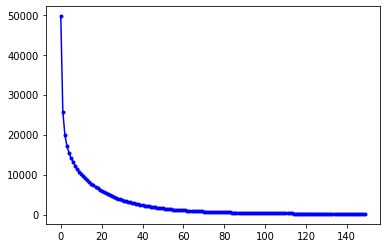

In [13]:
plt.plot(range(150), model.eval_['cost'],'b.-')

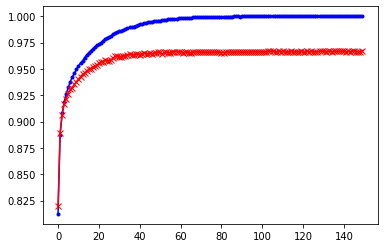

In [15]:
plt.plot(range(150), model.eval_['train_acc'],'b.-')
plt.plot(range(150), model.eval_['valid_acc'],'rx-')

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[ 963,    1,    2,    1,    1,    3,    4,    3,    2,    0],
       [   0, 1123,    5,    0,    0,    2,    3,    2,    0,    0],
       [   8,    3,  987,   10,    5,    2,    2,    7,    8,    0],
       [   0,    1,    4,  982,    0,    7,    0,    6,    7,    3],
       [   1,    0,    5,    0,  951,    0,    7,    3,    2,   13],
       [   6,    2,    1,   13,    2,  845,    6,    0,   14,    3],
       [   6,    3,    0,    0,    4,    6,  936,    0,    3,    0],
       [   0,    4,   16,    5,    1,    1,    0,  989,    3,    9],
       [   4,    1,    4,    5,    4,    8,    1,    6,  930,   11],
       [   1,    3,    2,    9,   10,    5,    0,   11,    8,  960]])

In [18]:
true_count = np.trace(conf_mx)
print('accuracy = %d/%d = %lf' % (true_count, len(y_test), true_count/len(y_test)) )

accuracy = 9666/10000 = 0.966600
